# EDA Process: From Data Inspection to Cleaning

## Data Inspection & Understanding

In [4]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/SatyajitKumar123/DataSets/refs/heads/main/complex_customer_data.csv?token=GHSAT0AAAAAAC756TNT4OPRR26IKQ2NORCQZ7ZJRIA")

In [10]:
## Basic Inspection
print("Number of Rows: ", df.shape[0])
print("Number of Columns: ", df.shape[1])

Number of Rows:  10800
Number of Columns:  15


In [15]:
print("\n=== Column Data Types===")
print(df.dtypes)


=== Column Data Types===
customer_id            object
full_name              object
birth_date             object
gender                 object
email                  object
join_date              object
last_purchase          object
total_spent           float64
membership_tier        object
discount_used          object
product_rating         object
address                object
phone_number           object
loyalty_points         object
purchase_frequency     object
dtype: object


In [17]:
df.head()

,customer_id,full_name,birth_date,gender,email,join_date,last_purchase,total_spent,membership_tier,discount_used,product_rating,address,phone_number,loyalty_points,purchase_frequency
0,CUST10000,Susan Chen,1968-09-22,U,michelle29@example.com,2021-09-13,2024-04-19,625.30,NaN,No,2,"9690 John Spurs Apt. 752, Walterton, AZ 76832",+1-989-849-8686x9866,3309,Monthly
1,CUST10001,Bryan Horn,1974-06-25,Female,jessicafuller@example.com,2021-01-28,2024-05-30,528.01,gold,True,5 stars,"52018 Hubbard Islands, Archerchester, ND 19523",721.294.7898x226,1771,NaN
2,CUST10002,LAUREN HARDY,1992-11-14,m,littlemichael@example.com,2020-06-08,2025-02-18,302.17,Gold,True,3,"06170 Mary Parkways, Tammybury, SC 62336",001-210-269-7386x698,2040,Monthly
3,CUST10003,AMY CERVANTES,1949-05-09,U,aross@example.net,2022-11-10,2024-08-23,501.20,Bronze,1,5 stars,"780 Gilbert Centers Suite 823, West Kelly, MO ...",901.424.8464x0519,2759,weekly
4,CUST10004,Amanda Taylor,1950-03-29,Male,smithjoshua@example.net,2021-08-10,2024-05-31,285.68,GOLD,0,NaN,"888 Taylor Pass, Garrettchester, DE 25596",(730)316-0114,2120,weekly


In [19]:
df.describe(include='all')

,customer_id,full_name,birth_date,gender,email,join_date,last_purchase,total_spent,membership_tier,discount_used,product_rating,address,phone_number,loyalty_points,purchase_frequency
count,10800,10800,10800,9470,10504,10800,10060,10800.000000,9462,9589,8365,10800,9241,10800,9220
unique,10300,9636,8132,7,9064,3027,366,NaN,7,8,7,10161,8264,5596,6
top,CUST13900,Michael Davis,1953-11-15,m,invalid_email@,Invalid Date,2024-12-08,NaN,silver,False,4,"286 Amy Drives, West Mirandaburgh, NJ 41273",123-456,4554,weekly
freq,2,7,6,1371,540,540,44,NaN,1391,1243,1259,3,324,11,1564
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,810.015210,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3217.032404,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,298.642500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,503.135000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,707.397500,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Missing Value Analysis

In [26]:
print("=== Missing Values ===")
missing = df.isna().sum()
print(missing[missing > 0])

=== Missing Values ===
gender                1330
email                  296
last_purchase          740
membership_tier       1338
discount_used         1211
product_rating        2435
phone_number          1559
purchase_frequency    1580
dtype: int64


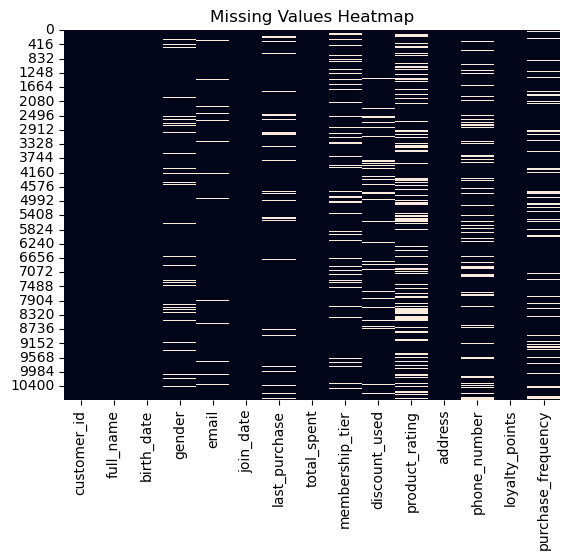

In [28]:
## Visualizing missingness
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

## Basic Data Cleaning

In [31]:
df.columns

Index(['customer_id', 'full_name', 'birth_date', 'gender', 'email',
       'join_date', 'last_purchase', 'total_spent', 'membership_tier',
       'discount_used', 'product_rating', 'address', 'phone_number',
       'loyalty_points', 'purchase_frequency'],
      dtype='object')

In [34]:
## For datetime (last_purchase): filling with mode
df['last_purchase'] = pd.to_datetime(df['last_purchase'])

mode_date = df['last_purchase'].mode()[0]

df['last_purchase'] = df['last_purchase'].fillna(mode_date)

In [40]:
df['last_purchase'].isna().sum()

0

In [42]:
## For categorical (gender): new category 'Unknown'
df['gender'] = df['gender'].fillna('Unknown')

In [44]:
df['gender'].isna().sum()

0

In [52]:
## For numerical (loyalty_points): median imputation
df['loyalty_points'] = pd.to_numeric(df['loyalty_points'], errors='coerce')

In [54]:
df['loyalty_points'].isna().sum()

1620

In [56]:
df['loyalty_points'] = df['loyalty_points'].fillna(df['loyalty_points'].median())
df['loyalty_points'].isna().sum()

0

## Standardizing Text Data
* Clean name, email, and address fields.

In [59]:
df.columns

Index(['customer_id', 'full_name', 'birth_date', 'gender', 'email',
       'join_date', 'last_purchase', 'total_spent', 'membership_tier',
       'discount_used', 'product_rating', 'address', 'phone_number',
       'loyalty_points', 'purchase_frequency'],
      dtype='object')

In [61]:
## Names: Title case and remove extra spaces
df['full_name']

0               Susan Chen
1               Bryan Horn
2             LAUREN HARDY
3            AMY CERVANTES
4            Amanda Taylor
               ...        
10795     MICHELLE WHEELER
10796    Sarah Lambert PhD
10797       Jeffrey Steele
10798          Jason Cross
10799     Alexandra Lawson
Name: full_name, Length: 10800, dtype: object

In [63]:
df['full_name'] = df['full_name'].str.title().str.replace(r'\s+', ' ', regex=True)

In [65]:
df['full_name']

0               Susan Chen
1               Bryan Horn
2             Lauren Hardy
3            Amy Cervantes
4            Amanda Taylor
               ...        
10795     Michelle Wheeler
10796    Sarah Lambert Phd
10797       Jeffrey Steele
10798          Jason Cross
10799     Alexandra Lawson
Name: full_name, Length: 10800, dtype: object

In [67]:
## Emails: Lowercase and validate format
df['email']

0            michelle29@example.com
1         jessicafuller@example.com
2         littlemichael@example.com
3                 aross@example.net
4           smithjoshua@example.net
                    ...            
10795      matthewsgail@example.net
10796    ricardoharrell@example.net
10797       changdustin@example.net
10798    stanleykenneth@example.net
10799        cesardavis@example.com
Name: email, Length: 10800, dtype: object

In [69]:
df['email'] = df['email'].str.lower()

In [71]:
invalid_emails = ~df['email'].str.contains(r'^[\w\.-]+@[\w\.-]+\.\w+$', na=False)

In [73]:
df.loc[invalid_emails, 'email'] = np.nan

In [77]:
df['address']

0            9690 John Spurs Apt. 752, Walterton, AZ 76832
1           52018 Hubbard Islands, Archerchester, ND 19523
2                 06170 Mary Parkways, Tammybury, SC 62336
3        780 Gilbert Centers Suite 823, West Kelly, MO ...
4                888 Taylor Pass, Garrettchester, DE 25596
                               ...                        
10795             212 Marie Freeway, Mirandaside, WV 54004
10796          878 Derrick Skyway, Alexandraport, AL 59620
10797                     PSC 3766, Box 1669, APO AE 32811
10798    540 Clark Lakes Suite 140, Lake Travisborough,...
10799    01081 Shaffer Radial, West Katherinechester, I...
Name: address, Length: 10800, dtype: object

In [81]:
df[['full_name', 'email']].sample(3)

,full_name,email
2427,Amanda Smith,NaN
93,Nathaniel Stewart,NaN
17,Christopher Jackson,dana04@example.net


## Intermediate Data Cleaning

In [84]:
df.columns

Index(['customer_id', 'full_name', 'birth_date', 'gender', 'email',
       'join_date', 'last_purchase', 'total_spent', 'membership_tier',
       'discount_used', 'product_rating', 'address', 'phone_number',
       'loyalty_points', 'purchase_frequency'],
      dtype='object')

In [86]:
## Convert dates with error handling
df['join_date']

0        2021-09-13
1        2021-01-28
2        2020-06-08
3        2022-11-10
4        2021-08-10
            ...    
10795    2023-10-01
10796    10/20/2023
10797    2020-06-27
10798    2023-06-13
10799    2020-07-23
Name: join_date, Length: 10800, dtype: object

In [88]:
df['join_date'] = pd.to_datetime(df['join_date'], errors='coerce')

In [90]:
df['birth_date']

0        1968-09-22
1        1974-06-25
2        1992-11-14
3        1949-05-09
4        1950-03-29
            ...    
10795    1998-11-17
10796    1977-03-01
10797    1981-04-30
10798    1953-11-15
10799    1957-02-15
Name: birth_date, Length: 10800, dtype: object

In [92]:
df['birth_date'] = pd.to_datetime(df['birth_date'], errors='coerce')

In [94]:
## Created new features
df['customer_tenure'] = (pd.to_datetime('today') - df['join_date']).dt.days

In [103]:
df.customer_tenure.sample(5)

9993     424.0
6288       NaN
9588     757.0
2421     845.0
6933    1667.0
Name: customer_tenure, dtype: float64

In [105]:
df['age'] = (pd.to_datetime('today') - df['birth_date']).dt.days//365

In [107]:
df['age'].sample(5)

2280    70
6102    31
1876    46
6649    24
304     64
Name: age, dtype: int64

In [109]:
df['days_since_purchase'] = (pd.to_datetime('today') - df['last_purchase']).dt.days

In [111]:
df[['customer_tenure', 'age', 'days_since_purchase']].describe()

,customer_tenure,age,days_since_purchase
count,8210.000000,10800.000000,10800.000000
mean,913.047259,49.130648,177.890926
std,527.616425,18.208876,103.524774
min,1.000000,18.000000,1.000000
25%,454.000000,33.000000,95.000000
50%,912.000000,49.000000,169.000000
75%,1367.000000,65.000000,267.000000
max,1827.000000,81.000000,366.000000


## Categorical Value Standardization

In [114]:
df.columns

Index(['customer_id', 'full_name', 'birth_date', 'gender', 'email',
       'join_date', 'last_purchase', 'total_spent', 'membership_tier',
       'discount_used', 'product_rating', 'address', 'phone_number',
       'loyalty_points', 'purchase_frequency', 'customer_tenure', 'age',
       'days_since_purchase'],
      dtype='object')

In [122]:
df.gender.sample(5)

3535        Male
4361           U
10788          f
1231     Unknown
3684      Female
Name: gender, dtype: object

In [124]:
gender_map = {'M': 'Male', 'Male': 'Male', 'm': 'Male',
              'F': 'Female', 'Female': 'Female', 'f': 'Female'}
df['gender'] = df['gender'].map(gender_map).fillna('Unknown')

In [130]:
df.gender.sample(5)

1439        Male
10484       Male
2968     Unknown
6654      Female
2617     Unknown
Name: gender, dtype: object

In [132]:
df['membership_tier']

0           NaN
1          gold
2          Gold
3        Bronze
4          GOLD
          ...  
10795    Bronze
10796       NaN
10797    Bronze
10798    bronze
10799    Bronze
Name: membership_tier, Length: 10800, dtype: object

In [134]:
## Membership tier cleaning
df['membership_tier'] = (df['membership_tier']
                         .str.capitalize()
                         .replace({'Gold': 'Gold', 'Silver': 'Silver', 'Bronze': 'Bronze'}))

In [136]:
df['membership_tier'].sample(5)

4086       Gold
8497     Bronze
10125    Silver
4342     Silver
7437       Gold
Name: membership_tier, dtype: object

In [144]:
df['purchase_frequency'].sample(10)

8607       NaN
5107    Weekly
6283    Yearly
9897     daily
2320       NaN
8293    weekly
6942    Yearly
279     Yearly
5719    weekly
9875     Daily
Name: purchase_frequency, dtype: object

In [146]:
df['purchase_frequency'] = (df['purchase_frequency']
                           .str.title()
                           .replace({'Daily': 'Daily', 'Weekly': 'Weekly',
                                    'Monthly': 'Monthly', 'Yearly': 'Yearly'}))

In [148]:
df['purchase_frequency'].sample(10)

298          NaN
3304         NaN
9356     Monthly
10720     Weekly
7997       Daily
7955     Monthly
2496       Daily
4272      Weekly
8882      Weekly
6733      Weekly
Name: purchase_frequency, dtype: object

In [150]:
df['gender'].value_counts()

gender
Male       4071
Female     4049
Unknown    2680
Name: count, dtype: int64

In [152]:
df['membership_tier'].value_counts()

membership_tier
Gold      4024
Bronze    2722
Silver    2716
Name: count, dtype: int64

## Outlier Detection
* Indentifying and handling outliers in numerical columns

In [158]:
df.columns

Index(['customer_id', 'full_name', 'birth_date', 'gender', 'email',
       'join_date', 'last_purchase', 'total_spent', 'membership_tier',
       'discount_used', 'product_rating', 'address', 'phone_number',
       'loyalty_points', 'purchase_frequency', 'customer_tenure', 'age',
       'days_since_purchase'],
      dtype='object')

In [160]:
import matplotlib.pyplot as plt

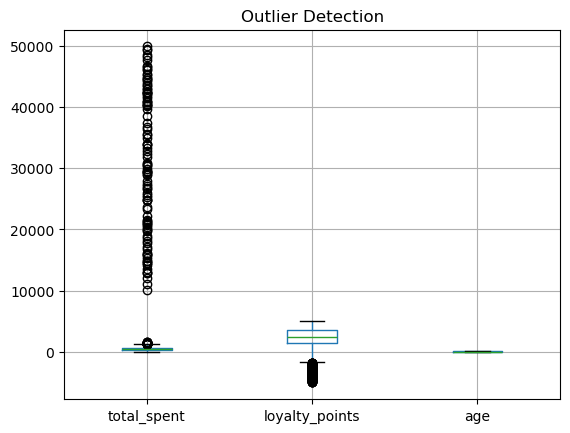

In [162]:
## Visual detection
num_cols = ['total_spent', 'loyalty_points', 'age']
df[num_cols].boxplot()
plt.title('Outlier Detection')
plt.show()

In [164]:
## IQR method
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3-Q1

In [176]:
## Capping outliers
for col in num_cols:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    df[col] = df[col].clip(lower_bound, upper_bound)
print(df[num_cols].describe())

        total_spent  loyalty_points           age
count  10800.000000    10800.000000  10800.000000
mean     517.020805     2425.178380     49.130648
std      287.083891     1421.714945     18.208876
min        0.140000    -1743.500000     18.000000
25%      298.642500     1399.000000     33.000000
50%      503.135000     2461.000000     49.000000
75%      707.397500     3494.000000     65.000000
max     1320.530000     4999.000000     81.000000


## Correlation Analysis
* Exploring relationships between numerical variables

In [180]:
df.columns

Index(['customer_id', 'full_name', 'birth_date', 'gender', 'email',
       'join_date', 'last_purchase', 'total_spent', 'membership_tier',
       'discount_used', 'product_rating', 'address', 'phone_number',
       'loyalty_points', 'purchase_frequency', 'customer_tenure', 'age',
       'days_since_purchase'],
      dtype='object')

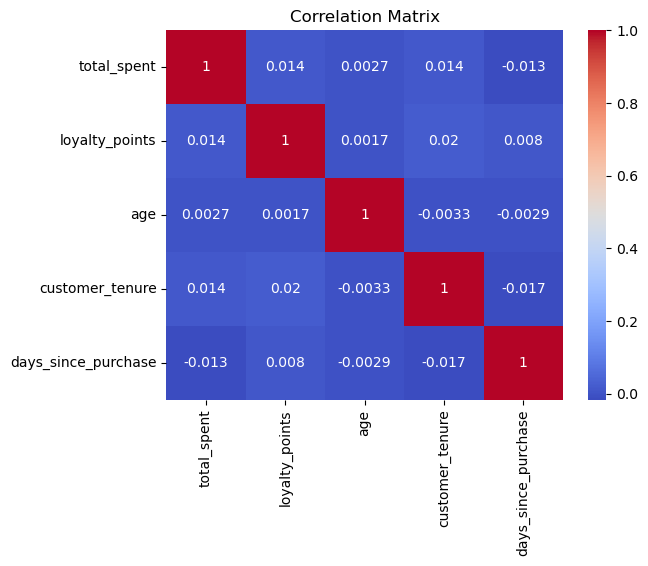

In [182]:
corr_matrix = df[num_cols + ['customer_tenure', 'days_since_purchase']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [184]:
## Segment analysis
print("\nAVG spending by membership tier:")
df.groupby('membership_tier')['total_spent'].mean().sort_values(ascending=False)


AVG spending by membership tier:


membership_tier
Bronze    527.780606
Gold      513.143211
Silver    512.892058
Name: total_spent, dtype: float64

## Final Data Quality Report

In [187]:
def generate_quality_report(df):
    report = {
        'remaining_missing': df.isna().sum().sum(),
        'duplicate_rows': df.duplicated().sum(),
        'numeric_ranges': {col: (df[col].min(), df[col].max())
                          for col in num_cols},
        'categorical_values': {col: df[col].nunique()
                              for col in df.select_dtypes(include='object')},
        'date_consistency': {
            'join_before_purchase': (df['join_date'] <= df['last_purchase']).all(),
            'valid_ages': df['age'].between(18,100).all()
        }
    }
    return report

In [189]:
quality_report = generate_quality_report(df)
print("=== Final Data Quality Report ===")
for k, v in quality_report.items():
    print(f"\n{k.replace('_', ' ').title()}:")
    print(v)

=== Final Data Quality Report ===

Remaining Missing:
14139

Duplicate Rows:
160

Numeric Ranges:
{'total_spent': (0.14, 1320.53), 'loyalty_points': (-1743.5, 4999.0), 'age': (18, 81)}

Categorical Values:
{'customer_id': 10300, 'full_name': 9404, 'gender': 3, 'email': 9063, 'membership_tier': 3, 'discount_used': 8, 'product_rating': 7, 'address': 10161, 'phone_number': 8264, 'purchase_frequency': 4}

Date Consistency:
{'join_before_purchase': False, 'valid_ages': True}
